In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [0]:
df_train = pd.read_csv('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/dataset/train.csv')

In [0]:
df_test = pd.read_csv('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/dataset/test.csv')

In [5]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


## EDA

In [6]:
df_train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [7]:
df_train.shape

(200000, 202)

In [8]:
df_train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [0]:
dtypes = df_train.dtypes

In [0]:
is_float = []
not_floats = []
for dtype in dtypes:
    if dtype == 'float64':
        is_float.append(True)
    else:
        not_floats.append(dtype)

In [11]:
len(dtypes)

202

In [12]:
sum(is_float)

200

In [13]:
print(not_floats)

[dtype('O'), dtype('int64')]


In [14]:
df_train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [15]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


#### Extracting target variable from the dataframe, and independent feature variables into y and X respectively

In [0]:
y = df_train['target']

In [0]:
X = df_train.iloc[:, 2:]

In [0]:
import seaborn as sns

### Checking distribution of target variable values

#### <font color='green'>Dataset is imbalanced</font>
Class '0' has much more examples than Class '1'

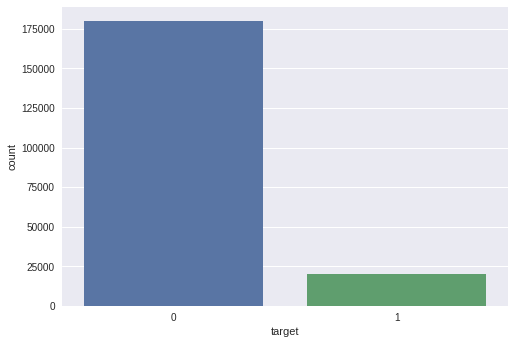

In [19]:
sns.countplot(y)

In [20]:
y.value_counts()

0    179902
1     20098
Name: target, dtype: int64

### Univariate Analysis

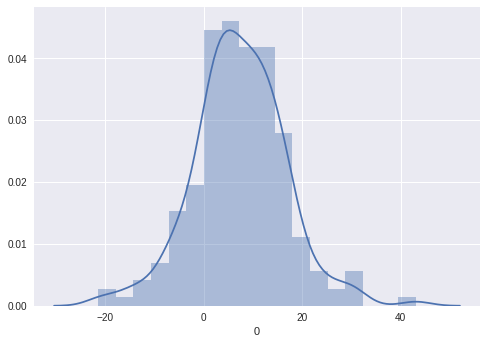

In [21]:
sns.distplot(X.iloc[0])

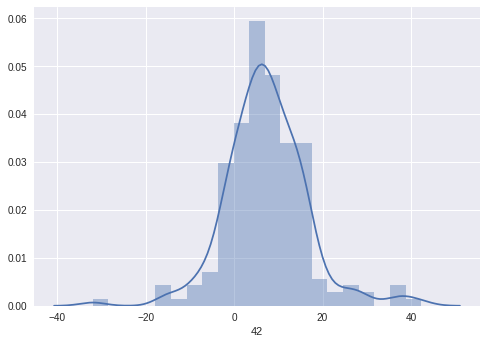

In [22]:
sns.distplot(X.iloc[42])

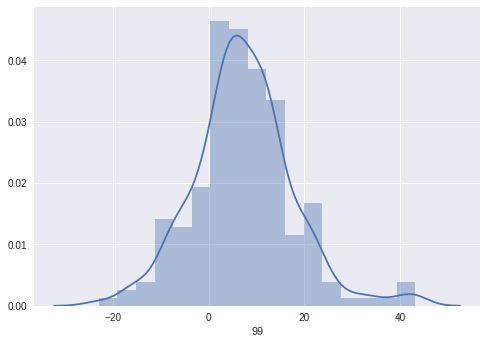

In [23]:
sns.distplot(X.iloc[99])

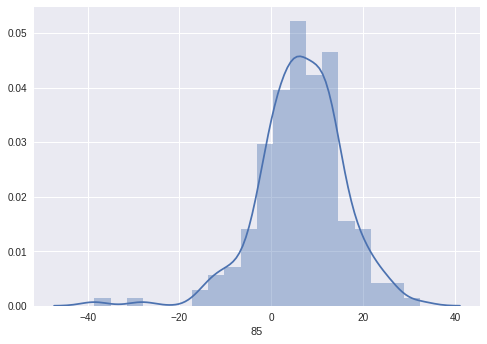

In [24]:
sns.distplot(X.iloc[85])

#### <font color='orange'>No feature seem to have values concentrated around some particular value.</font>
Let's confirm


In [0]:
import matplotlib.pyplot as plt

In [26]:
X.shape

(200000, 200)

In [27]:
fig = plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

In [0]:
def matrix_plotter(m, n, feature_columns):
    plot_count = 1
    plt.tight_layout()
    for feature_column in feature_columns:
        plt.subplot(m, n, plot_count)
        sns.distplot(X.iloc[feature_column])
        plot_count += 1
    plt.show()

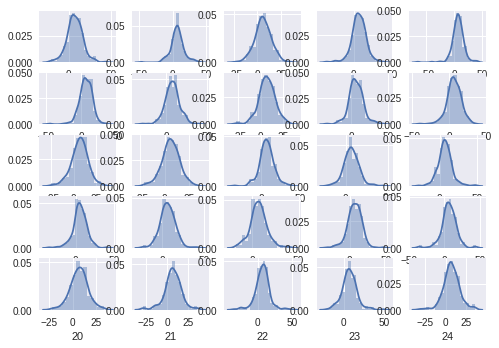

In [29]:
matrix_plotter(5, 5, [x for x in range(25)])

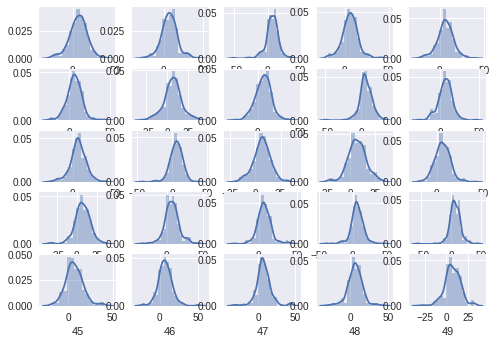

In [30]:
matrix_plotter(5, 5, [x for x in range(25, 50)])

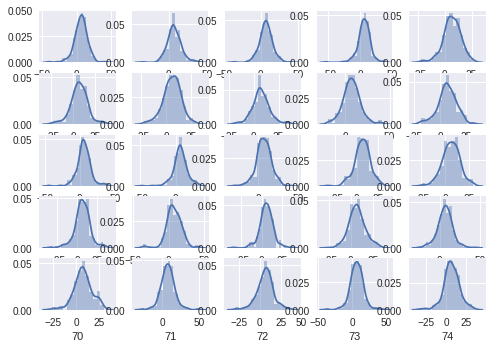

In [31]:
matrix_plotter(5, 5, [x for x in range(50, 75)])

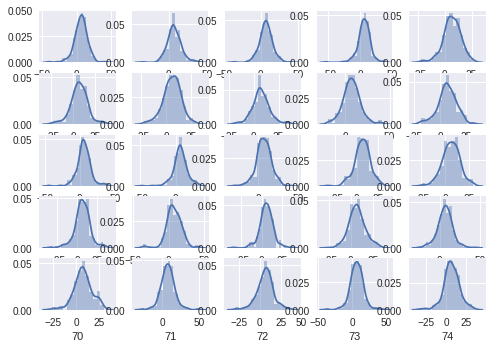

In [32]:
matrix_plotter(5, 5, [x for x in range(50, 75)])

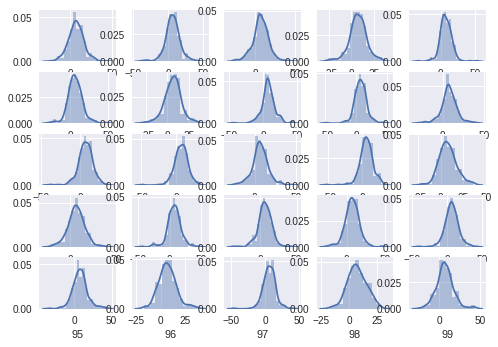

In [33]:
matrix_plotter(5, 5, [x for x in range(75, 100)])

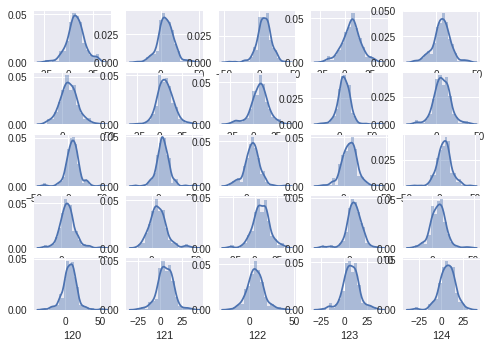

In [34]:
matrix_plotter(5, 5, [x for x in range(100, 125)])

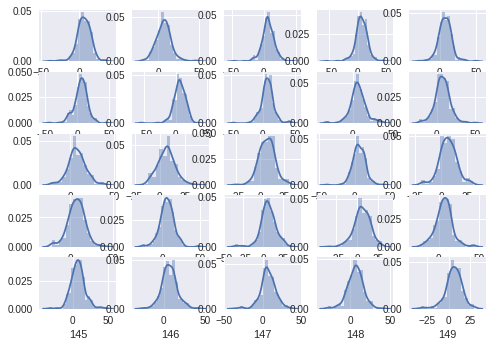

In [35]:
matrix_plotter(5, 5, [x for x in range(125, 150)])

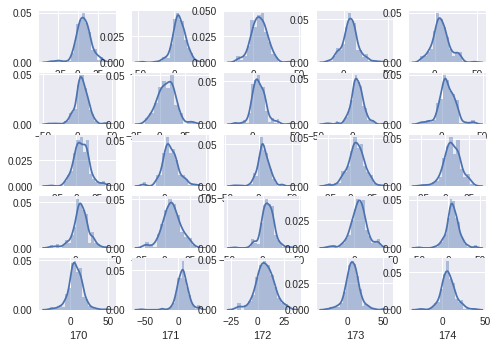

In [36]:
# plot of feature number 162 seems suspicious
matrix_plotter(5, 5, [x for x in range(150, 175)])

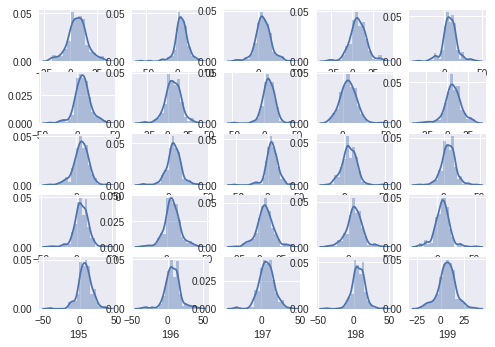

In [37]:
matrix_plotter(5, 5, [x for x in range(175, 200)])

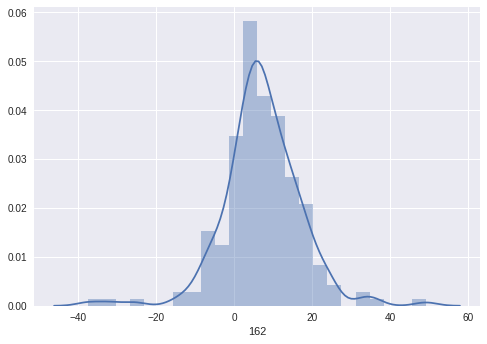

In [38]:
# the values are nicely distributed
sns.distplot(X.iloc[162])

In [39]:
X.iloc[162].describe()

count    200.000000
mean       7.149593
std       10.120900
min      -37.400500
25%        2.152175
50%        6.539800
75%       12.812125
max       49.147000
Name: 162, dtype: float64

## Feature Scaling

In [0]:
## Chosen model is XGBoost (ensemble learning model that uses gradient boosted trees as base learners)
## so, feature scaling is unnecessary

# Model Building

In [0]:
# Split into train and test sets

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
from xgboost import XGBClassifier

#### Hyperparameter tuning

In an ideal world, with infinite resources and where time is not an issue, we could run a giant grid search with all the parameters together and find the optimal set of parameters.

In fact, we might even be able to do that with really small datasets, but as the data is not small in this problem, training time grows too, and thus, finding an optimum combination out of all possible combinations will be very expensive. For this reason it is important to understand the role of the parameters and focus on the steps that we expect to impact our results the most. 

In [0]:
from sklearn.model_selection import GridSearchCV

#### 1. Parameter Guessing

Training with values that worked well in some kaggle and AV competitions. The performance on X_test can be used as  a benchmark for new models.

In [0]:
import pickle as pkl
import os

In [0]:
if os.path.exists('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/xgbc.pkl'):
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/xgbc.pkl', 'rb') as xgbc:
    xgbc = pkl.load(xgbc)
else:
  xgbc = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=5,
                   min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                   objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27)
  xgbc.fit(X_train, y_train)
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/xgbc.pkl', 'wb') as xgbc_f:
    pkl.dump(xgbc, xgbc_f)

In [0]:
y_pred = xgbc.predict(X_test)

In [0]:
from sklearn.metrics import auc, roc_curve

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

In [51]:
auc(fpr, tpr)

0.6592349379968018

#### Custom tuning - 1

#### <font color='orange'>using custom grid search that uses xgb.cv() method</font>

Initialising parameters with default values for the moment. These will be tuned in a sequence so as the get the best possible values, if not optimum

In [0]:
!cd /content/mydrive/My\ Drive/ML_Projects/Kaggle/Santander

In [53]:
!wget https://s3-us-west-2.amazonaws.com/xgboost-wheels/xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

--2019-03-30 15:38:28--  https://s3-us-west-2.amazonaws.com/xgboost-wheels/xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.244.248
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.244.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16621349 (16M) [binary/octet-stream]
Saving to: ‘xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl.2’

xgboost-0.81-py2.py 100%[===================>]  15.85M  16.1MB/s    in 1.0s    

2019-03-30 15:38:29 (16.1 MB/s) - ‘xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl.2’ saved [16621349/16621349]



!pip uninstall xgboost -- uninstalled previous version of xgboost (non-gpu)

In [54]:
!pip install xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

In [0]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'scale_pos_weight': 1,
    # Other parameters
    'tree_method':'gpu_hist',

    'objective':'binary:logistic'
}

In [56]:
(y_train.values.shape)

(160000,)

In [0]:
import xgboost as xgb

In [0]:
dtrain = xgb.DMatrix(X_train.values, label=y_train.values)

In [0]:
num_boost_round = 999

#### <font color='blue'>1. Tuning max_depth and min_child_weight </font>
These parameters add constraints on the architecture of the trees.
`max_depth` is the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.
`min_child_weight` is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.

*Both parameters balance the bias-variance tradeoff, hence should be tuned together*

In [0]:
gridsearch_max_depths = list(range(5, 10, 2))
gridsearch_min_child_weights = list(range(5, 10, 2))

In [0]:
gridsearch_params = [(max_depth, min_child_weight)
                     for max_depth in gridsearch_max_depths
                     for min_child_weight in gridsearch_min_child_weights
                    ]

In [63]:
best_auc = 0
for max_depth, min_child_weight in gridsearch_params:
    print('CV with max_depth = {}, min_child_weight = {}'.format(max_depth, min_child_weight))
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    cv_results = xgb.cv(params,
                       dtrain,
                       num_boost_round=num_boost_round,
                       seed=1,
                       nfold=5,
                       metrics={'auc'},
                       early_stopping_rounds=10
                       )
    #update best auc
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))
    
    if best_auc<mean_auc:
      best_auc = mean_auc
      best_params = (max_depth, min_child_weight)
      
    print("Best params: {}, {}, AUC: {}".format(best_params[0], best_params[1], best_auc))

CV with max_depth = 5, min_child_weight = 5
	AUC 0.8707656 for 214 rounds
Best params: 5, 5, AUC: 0.8707656
CV with max_depth = 5, min_child_weight = 7
	AUC 0.8716276000000001 for 247 rounds
Best params: 5, 7, AUC: 0.8716276000000001
CV with max_depth = 5, min_child_weight = 9
	AUC 0.8715895999999999 for 220 rounds
Best params: 5, 7, AUC: 0.8716276000000001
CV with max_depth = 7, min_child_weight = 5
	AUC 0.874385 for 998 rounds
Best params: 7, 5, AUC: 0.874385
CV with max_depth = 7, min_child_weight = 7
	AUC 0.8718170000000001 for 697 rounds
Best params: 7, 5, AUC: 0.874385
CV with max_depth = 7, min_child_weight = 9
	AUC 0.8618812 for 216 rounds
Best params: 7, 5, AUC: 0.874385
CV with max_depth = 9, min_child_weight = 5
	AUC 0.8726505999999998 for 589 rounds
Best params: 7, 5, AUC: 0.874385
CV with max_depth = 9, min_child_weight = 7
	AUC 0.8751313999999999 for 963 rounds
Best params: 9, 7, AUC: 0.8751313999999999
CV with max_depth = 9, min_child_weight = 9
	AUC 0.8740036 for 875 ro

In [0]:
# reset the best parameters in the params dictionary
params['max_depth'] = 9
params['min_child_weight'] = 7